In [7]:
#Import libraries
import requests
import pydot
import pandas as pd


#Data visualization
import seaborn as sn
import matplotlib.pyplot as plt

#Data Manipulation
import pandas as pd
import numpy as np

# Machine Learning
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Activation, BatchNormalization
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split, KFold

print(tf.__version__)

2.10.0


In [23]:
def plot_line(metric, title, label):
    plt.figure(figsize=(8,3))
    plt.title(title, fontsize = 16)
    plt.plot(metric, label = label)
    plt.xlabel("Epochs", fontsize = 14)
    plt.grid()
    plt.legend(loc= "best")

def scatter_plot(trueValues, predictions, title):
  plt.figure(figsize=(8,3))
  ax = plt.axes()
  maxVal = max( max(trueValues), max(predictions) )

  ax.scatter(trueValues, predictions)
  ax.plot([0,10,20,maxVal], [0,10,20,maxVal])
  plt.title(title, fontsize = 16)
  plt.xlabel("Predictions", fontsize = 14)
  plt.ylabel("Real", fontsize = 14)
  plt.grid()


# 1. Load the Dataset
We are going to use one dataset from UCI Machine Learning Repository. You can download the Energy Efficient Dataset using the following link. You can use pandas to download and open the data set which is in excel format or load from your local machine.

In [11]:
#url dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

#read in excel format
df = pd.read_excel(URL)

print("From web")

df.head()

From web


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# 2. Overview of data


In [12]:
# Data summary
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [13]:
# Dimension of the dataset
df.shape

(768, 10)

In [14]:
# Check info about missing values in dataframe
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

# Exploratory Data Analysis


# Data preparation


1.   Convert dataframe to numpy array for flexibility.
2. Split our data into training and testing datasets and store the target values in different variables.
3.   Normalize the features by applying some operations in the data sets.




In [15]:
# Convert to numpy array
numpy_dataset= df.values

dataset_x = numpy_dataset[:, :8]
dataset_y = numpy_dataset[:, 8:]

In [16]:
from sklearn.preprocessing import MinMaxScaler

#Normalizing the data set
scaler = StandardScaler()

# Perform column-wise normalization and scaling
X_normalized = scaler.fit_transform(dataset_x)

## Splitting dataset to test and train+validate

In [ ]:
# Perform train-test split on the normalized features
X_train, X_test, y_train, y_test = train_test_split(X_normalized, dataset_y, 
                                                    test_size=0.2, 
                                                    random_state=42)


# K-cross Validation
* Input features: 8
* Output targets: 2


In [17]:
from keras import layers, Sequential

# Define the model-building function
def my_model():
  my_model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(8,)),
    layers.BatchNormalization(),  # Batch normalization layer
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization layer
    layers.Dense(2)  # Output layer with 2 neurons for the two regression targets
  ])

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  my_model.compile(
      optimizer = opt,
              loss = 'mse',
              metrics = tf.keras.metrics.RootMeanSquaredError()
  )

  return my_model

In [25]:
from sklearn.model_selection import KFold
import numpy as np

K_FOLD_SPLITS = 10

# Define the cross-validation process to be used inside cross_val_Score evaluation
cv = KFold(n_splits=K_FOLD_SPLITS)

# Handling for accommodating multiple targets
Y1 = y_train[:,0]
Y2 = y_train[:,1]
targets = (Y1, Y2)

i = 0
arr_loss = list()
arr_rmse = list()
min_loss = 1000000
best_model = None
final_testX = None
final_testY = None

# Perform k-fold cross-validation
for train_indices, test_indices in cv.split(X_train):
  print('####################### Iteration  ', i, ' #######################')
  trainX, testX = X[train_indices], X[test_indices]
  trainY = (Y1[train_indices], Y2[train_indices])
  testY = (Y1[test_indices], Y2[test_indices])

  model = my_model()
  model.fit(trainX, trainY,
            epochs=20,
            validation_data = (testX, testY)
  )


  #testing on validation set process
  loss, rmse = model.evaluate(x = testX, y = testY, verbose=1)
  print(f"Loss = {loss}, rmse = {rmse}" )

  if loss < min_loss:
    best_model = model
    min_loss = loss
    final_testX = testX
    final_testY = testY

  arr_loss.append(loss)
  arr_rmse.append(rmse)
  print('Loss array: ', arr_loss)
  i+=1

# Saving the best model within the k folds
best_model.save('kfold_best_model')

####################### Iteration   0  #######################


KeyboardInterrupt: 

# Results
- Plot of k-cross validation performance
- Scatter Plot of prediction results against true values

No handles with labels found to put in legend.


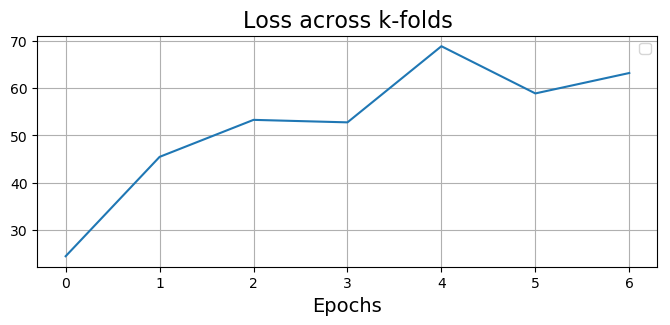

In [19]:
plot_line(arr_loss, "Loss across k-folds", None)

4/4 [==============================] - 0s 3ms/step
110


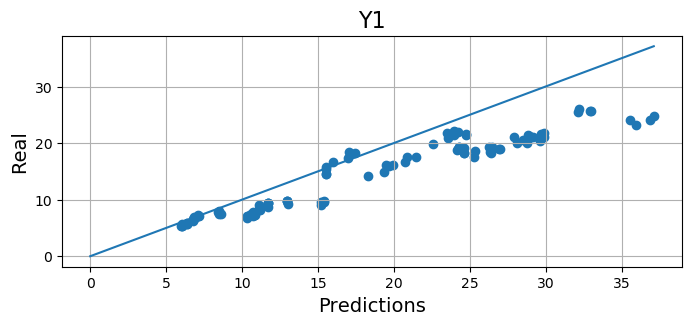

In [24]:
Y_pred = model.predict(final_testX)
Y_actual = np.array(final_testY)

print(final_testY[0].size)
scatter_plot(Y_actual[0,:], Y_pred[:,0], "Y1")